<a href="https://colab.research.google.com/github/hussain0048/Projects-/blob/master/Age%2C_Gender_and_Race_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📚Introduction**

# **📚Sections**

# **📚Import library**

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import os
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator as imgen
from keras.models import load_model, Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,BatchNormalization
from keras.preprocessing import image
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,mean_absolute_error

ImageDataGenerator is a class that provides a variety of methods for augmenting image data, such as rotating, zooming, and flipping images. This is particularly useful for deep learning models as it helps to prevent overfitting by creating more diverse training data from your existing images.

# **📚Load Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
data = pd.read_csv("/content/gdrive/MyDrive/Datasets (1)/Age, Gender and Race Prediction/age_gender.csv")
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [5]:
#shape
data.shape

(23705, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


# **Data Preprocessing**

In [7]:
# Getting Image data

def toPixels(pixels):
    arr = np.array(pixels.split(),"float64")
    arr = arr.reshape(48,48)

    return arr

In [8]:
%%time
data["pixels"] = data["pixels"].apply(toPixels)

CPU times: user 11.5 s, sys: 880 ms, total: 12.4 s
Wall time: 12.6 s


In [9]:
pixels = np.reshape(data["pixels"].to_list(), (data.shape[0],48,48,1))


In [11]:
pixels.shape


(23705, 48, 48, 1)

#**Age Prediction Model**


**Generating Datsets for Age Prediction**


In [12]:
x_train_age,x_test_age, y_train_age,y_test_age = train_test_split(pixels,np.array(data["age"]),random_state = 42, test_size = 0.2)
x_train_age,x_val_age, y_train_age,y_val_age = train_test_split(x_train_age,y_train_age,random_state = 21, test_size = 0.15)

In [13]:
print(x_train_age.shape,y_train_age.shape, x_test_age.shape,x_val_age.shape)

(16119, 48, 48, 1) (16119,) (4741, 48, 48, 1) (2845, 48, 48, 1)


**Image data Generator.**



In [14]:
traingen = imgen(rescale=1./255,
                zoom_range=0.2,
                 shear_range=0.2,
                 horizontal_flip= True
                )
valgen = imgen(rescale=1./255,
                zoom_range=0.2,
                 shear_range=0.2,
                 horizontal_flip= True
                )

testgen = imgen(rescale=1./255)

In [16]:
age_train_ds = traingen.flow(x_train_age,y_train_age,
                        batch_size = 32
                       )

age_val_ds = valgen.flow(x_val_age,y_val_age,
                        batch_size = 32
                       )

age_test_ds = testgen.flow(x_test_age,y_test_age,
                     batch_size = 32,
                    shuffle=False
                     )

In [17]:
#Visualizing one batch.
def showImagesAge(img,label):
    plt.figure(figsize=[22,15])
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(img[i])
        plt.title("Age is {}".format(label[i]))
        plt.axis('off')
    plt.show()



In [18]:
X,Y = next(age_train_ds)

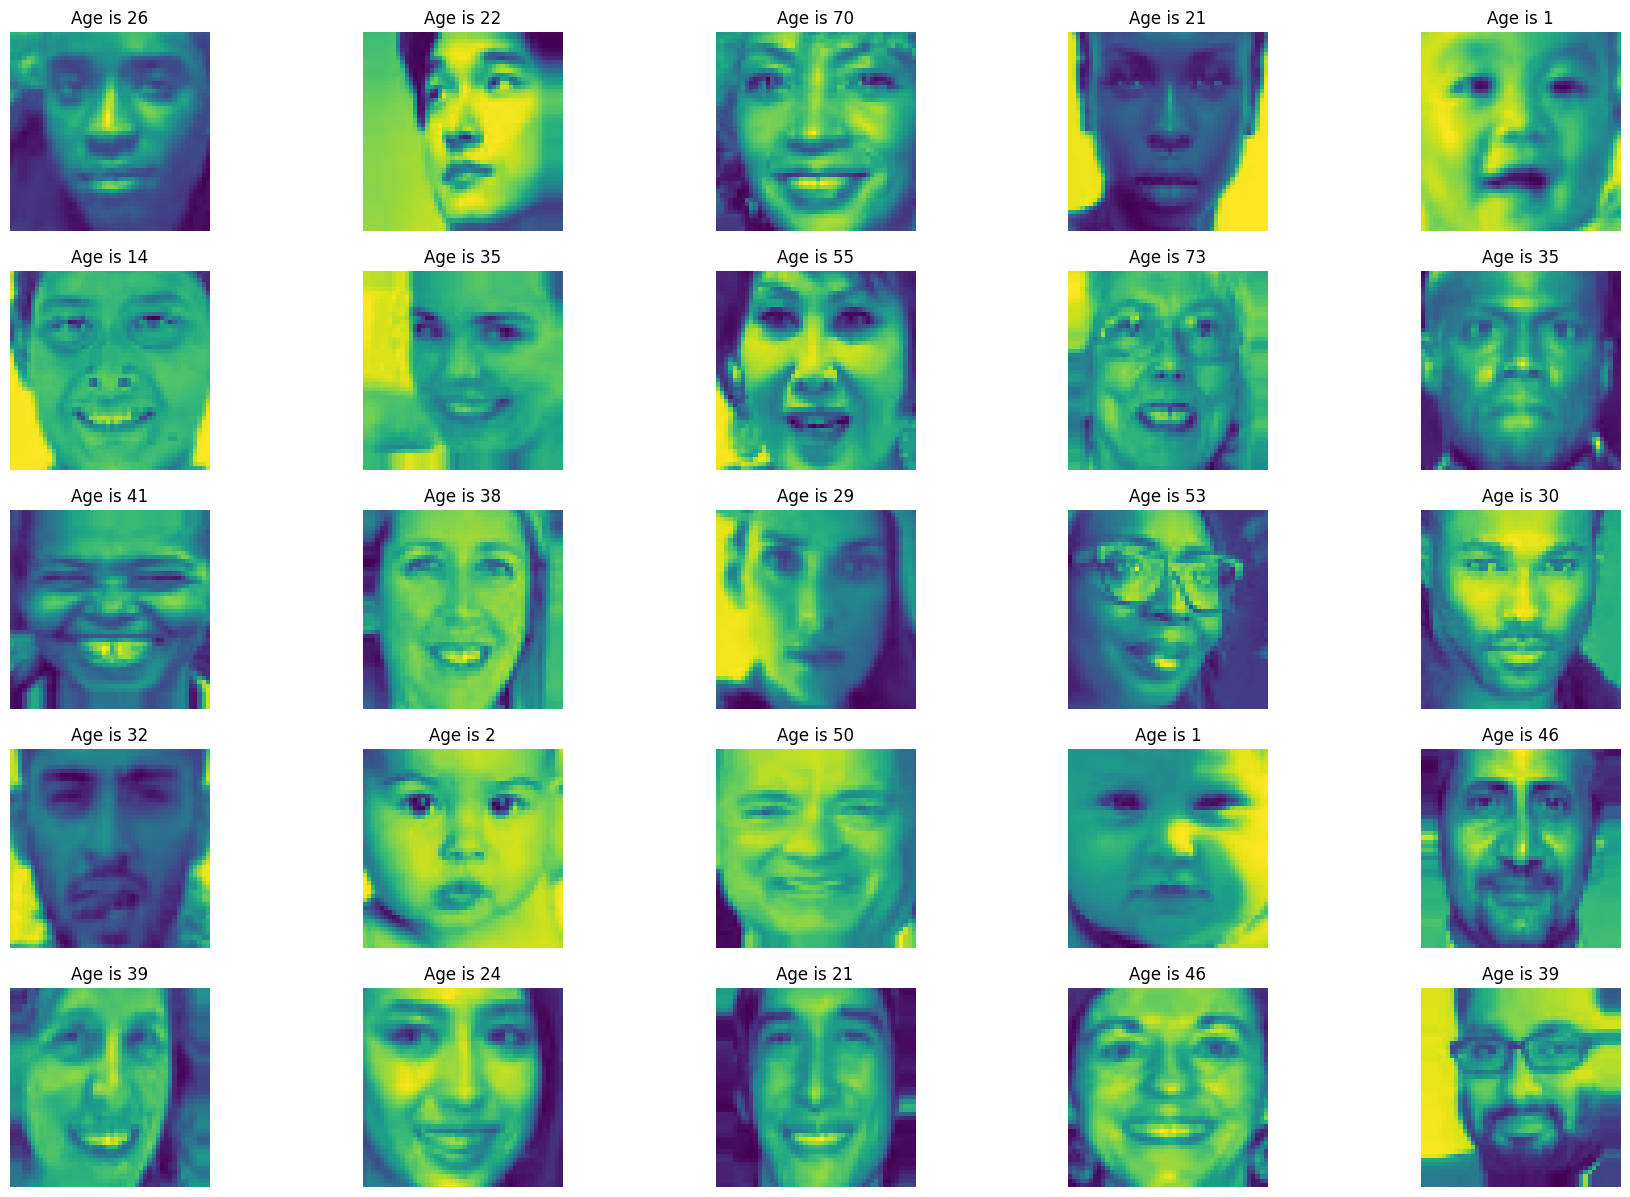

In [19]:
showImagesAge(X,Y)

# **References**

[1-Age, Gender and Race Prediction](https://github.com/prathimacode-hub/ML-ProjectKart/blob/main/Age%2C%20Gender%20and%20Ethnicity%20Prediction/Model/age_gender_race.ipynb)